<a href="https://colab.research.google.com/github/rosemilca-Ing/LearningGit/blob/main/Copie_de_SeanceIMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apprentissage Machine**

# **Objectif: Appentissage supervisé pour des données avec classes déséquilibrées.**

# **1. Séance 1: Analyse exploratoire des données déséquilibrées**


## **Pour les trois jeux de données, faites un analyse exploratoire des attributs:**


#### **Commentaires:**
L'étude se fera principal sur le jeu de données : Credit Fraud. Mais pour répondre à des questions qui ne sont pas pertinentes pour ce jeu, on utilisera d'autres jeux soit le jeu : Bank Marketing ou Employee Attrition Analysis.

In [ ]:
# Imported Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# Classifier Libraries
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


## **Jeu de données : Credit Fraud**

In [ ]:
#Chargement du jeu de données
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **- Quelles sont les dimensions du jeu de données, existe-t’il des valeurs manquantes ou des attributs constants?**

In [ ]:
#Credit Fraud
print(df_credit.shape)

(284807, 31)


#### **Commentaires :**
Le jeu de données a 284807 lignes et 31 colonnes.

In [ ]:
# Valeur manquantes
df_credit.isnull().sum().sum()


0

#### **Commentaires :**
Le jeu de données n'a pas de valeurs manquantes, ce qui est une bonne nouvelle.


In [ ]:
#Attributs constants
atr_cons = False
for col in df_credit.columns:
  if df_credit[col].nunique() == 1:
    valeur_constante = df_credit[col].unique()[0]
    count = df_credit[col].value_counts()[valeur_constante]
    atr_cons = True
    print("La colonne {} est constante avec une valeur de {} qui se répète {} fois.".format(col, valeur_constante, count))

if not atr_cons:
  print("Il n'ya pas d'attributs constants dans le jeu de données")

Il n'ya pas d'attributs constants dans le jeu de données


#### **Commentaires :**
Le jeu de données n'a pas d'attributs constants.

### **- Affichez à l’aide un graphe adapté la proportion d’individus qui ont churné**


In [ ]:
# Proportion
print('No Frauds', round(df_credit['Class'].value_counts()[0]/len(df_credit) * 100,2), '% of the dataset')
print('Frauds', round(df_credit['Class'].value_counts()[1]/len(df_credit) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


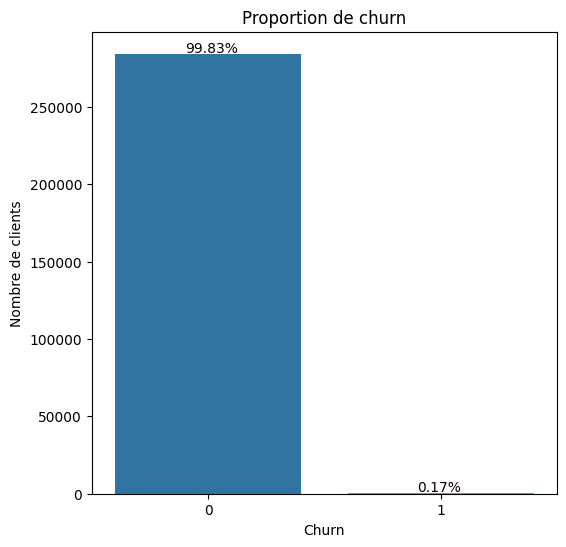

In [ ]:
#proportion d’individus qui ont churné
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Class', data=df_credit)
plt.title('Proportion de churn')
plt.xlabel('Churn')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_credit['Class'])), (p.get_x()+0.3, p.get_height()+1000))
plt.show()

#### **Commentaires :**

La petite proportion en orange représente les fraudeurs(Churn).
On peut voir que le jeu de données est très déséquilibré, avec une très faible proportion d'individus qui ont churné (fraudes) par rapport à ceux qui n'ont pas churné (transactions normales).

 Cela peut avoir un impact sur la performance des modèles d'apprentissage automatique, car ils peuvent avoir tendance à prédire majoritairement la classe majoritaire. Il est donc important de prendre cela en compte lors de la création de modèles de prédiction de churn.

 Cependant, on suivra l'évolution de l'exercice, mais on fera des commentaires pour expliquer les résultats obtenus.

### **- Pour chaque variable catégorielle, affichez à l’aide un graphe adapté la proportion de churn vs. non churn**


#### **Commentaires :**
Il n'ya pas de variables catégorielles pour ce jeu de données.


###**- Pour chaque variable numérique, affichez séparemment à l’aide un graphe adapté (eg. histogramme) les valeurs pour les populations churn & non churn**


#### **Les variables numériques :**
Toutes les variables sont numériques, cependant on utilisera 8 variables, V17, V14, V12, V10, V11, V4, V2 et V19.
Ces variables et le choix du graphe ont été faits sur la base de corrélation avec la variable cible, ce qu'on verra par la suite.

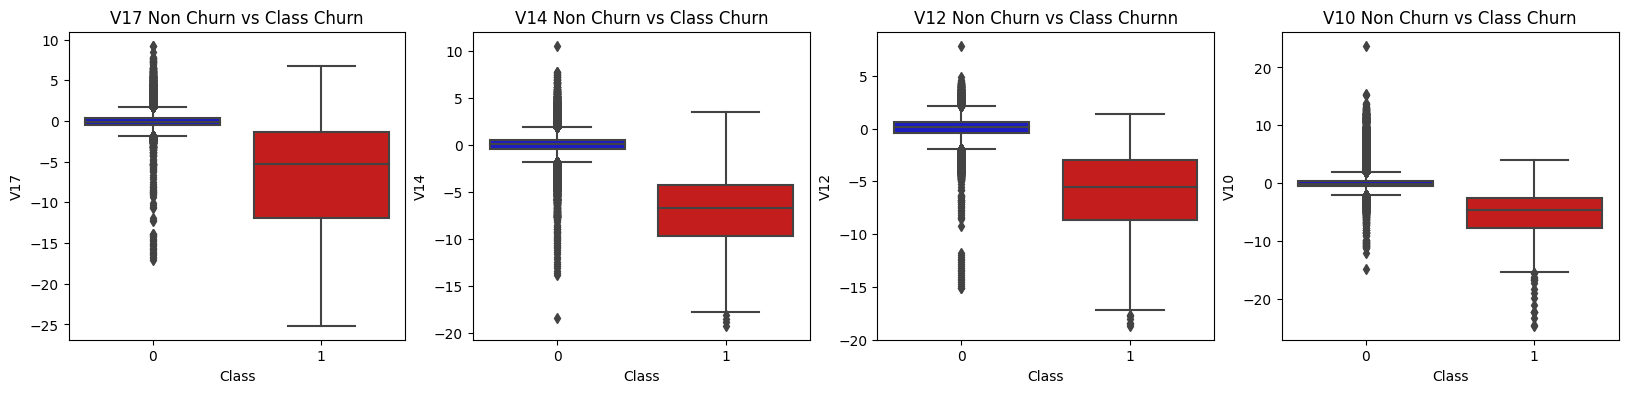

In [ ]:
#Boxplot
colors = ["#0101DF", "#DF0101"]

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=df_credit, palette=colors, ax=axes[0])
axes[0].set_title('V17 Non Churn vs Class Churn')

sns.boxplot(x="Class", y="V14", data=df_credit, palette=colors, ax=axes[1])
axes[1].set_title('V14 Non Churn vs Class Churn')


sns.boxplot(x="Class", y="V12", data=df_credit, palette=colors, ax=axes[2])
axes[2].set_title('V12 Non Churn vs Class Churnn')


sns.boxplot(x="Class", y="V10", data=df_credit, palette=colors, ax=axes[3])
axes[3].set_title('V10 Non Churn vs Class Churn')

plt.show()


#### **Commentaires :**
Pour les variables V17, V14, V12, V10, nous constatons des corrélations négatives avec la variable cible, ce qui signifie que des valeurs plus élevées de ces variables sont associées à des transactions non frauduleuses.

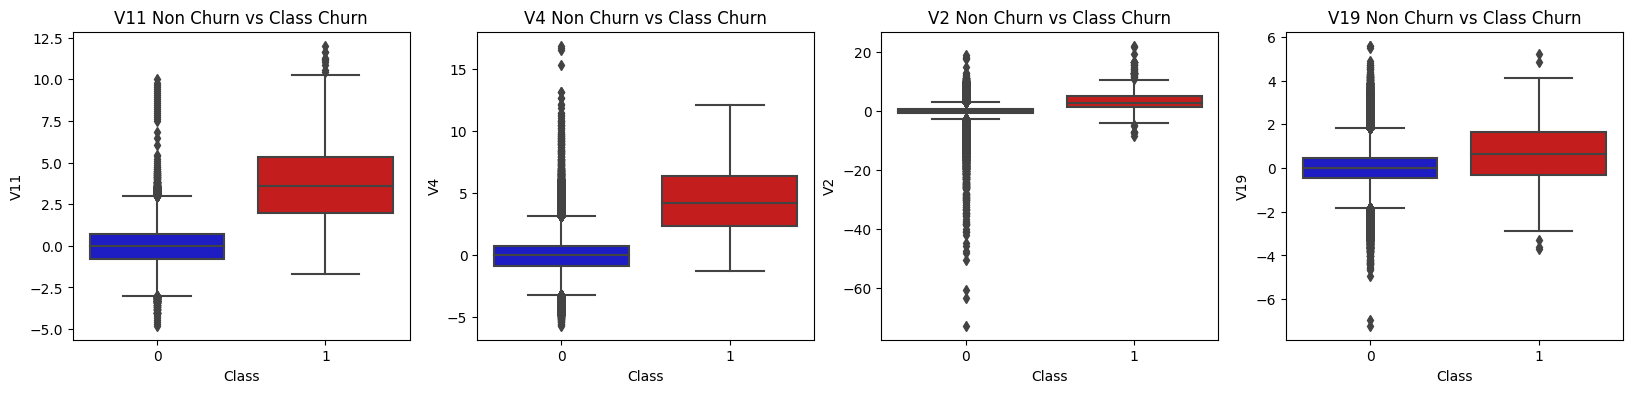

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df_credit, palette=colors, ax=axes[0])
axes[0].set_title('V11 Non Churn vs Class Churn')

sns.boxplot(x="Class", y="V4", data=df_credit, palette=colors, ax=axes[1])
axes[1].set_title('V4 Non Churn vs Class Churn')


sns.boxplot(x="Class", y="V2", data=df_credit, palette=colors, ax=axes[2])
axes[2].set_title('V2 Non Churn vs Class Churn')


sns.boxplot(x="Class", y="V19", data=df_credit, palette=colors, ax=axes[3])
axes[3].set_title('V19 Non Churn vs Class Churn')

plt.show()


#### **Commentaires :**
D'autre part, pour les variables V19 V11, V4, V2, nous observons des corrélations positives avec la variable cible, ce qui signifie que des valeurs plus élevées de ces variables sont associées à des transactions frauduleuses.

#### **Commentaires :**
On voit que les box-plot montrent une quantité exagérée de valeurs aberrantes au niveau des non churn c'est dû au fait que les classes soient trop déséquilibrées.
Les boxplots ci-dessus nous donnent une idée de la distribution des valeurs des variables numériques pour les populations churn et non churn.


En conclusion, les variables les plus influentes pour prédire la classe churn semblent être V17, V14, V12, V10, V11, V4, V2 et V19. Les autres variables ont des distributions similaires pour les populations churn et non churn, ce qui les rend moins utiles pour prédire la classe churn.



### **- Affichez la matrice de corrélation des attributs**



Text(0.5, 1.0, 'Correlation Matrix')

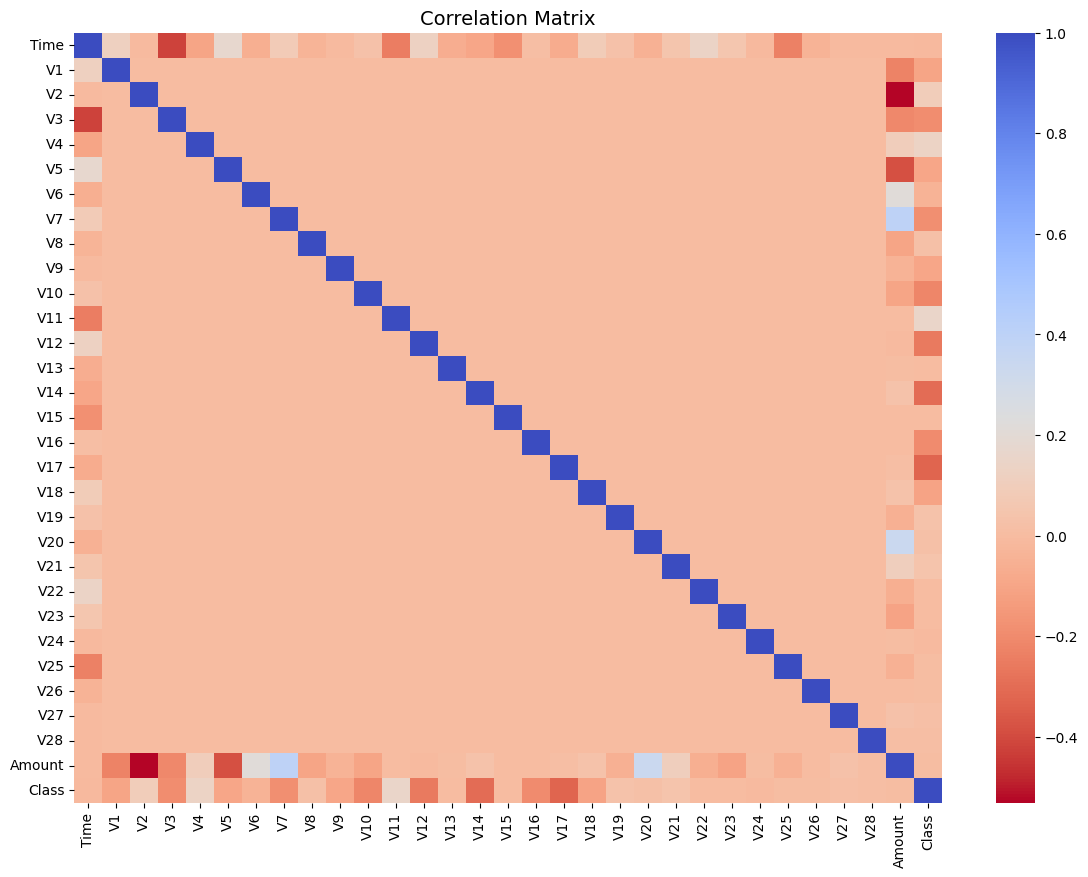

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(14,10))

# Entire DataFrame
corr = df_credit.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix", fontsize=14)

#### **Commentaires :**

On peut constater que certaines variables ont de forte corrélation positive ou négative avec la variable Class, comme V17, V14, V12, V11, V4 et V2. Ces variables pourraient donc être importantes pour prédire le churn.

### **(a) Que pouvez-vous déjà conclure? Y-a-t’il des attributs qui semblent être fortement liés au comportement de churn?**
En conclusion, cette analyse exploratoire des attributs du jeu de données "Credit Fraud" nous permet de constater que les variables V11, V4, V2, V19, V17, V12, V14 et V10 sont importantes pour prédire le churn. Ces variables ont des distributions différentes pour les populations churn et non churn et ont également une forte corrélation avec la variable Class. Il serait donc judicieux de les prendre en compte dans un modèle de prédiction de churn.
Il y a un fort déséquilibre dans le jeu de données.
On ne peut pas se fier à la matrice de corrélation pour parler de liaison forte des attributs mais si on regarde de près les boxplots, on peut voir que certains variables semblent etre liés au comportement de churn.

Serait-t-il le cas après certains traitements?

## **Jeu de données : Bank Marketing**

In [ ]:
#Faisons d'abord les traitements necessaires
#Chargement des données
df_bank = pd.read_csv('bank-additional-full.csv', sep = ';')
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Quelles sont les dimensions du jeu de données, existe-t’il des valeurs manquantes ou des attributs constants?**

In [ ]:
# Bank Marketing Shape
print(df_bank.shape)

(41188, 21)


#### **Commentaires :**
Le jeu de données a 41 188 lignes et 21 colonnes.

In [ ]:
# Bank Marketing Valeurs manquantes
df_bank.isnull().sum().sum()

0

#### **Commentaires :**
Le jeu de données n'a pas de valeurs manquantes.

In [ ]:
# Bank Marketing Attributs constants
atr_cons = False
for col in df_bank.columns:
  if df_bank[col].nunique() == 1:
    valeur_constante = df_bank[col].unique()[0]
    count = df_bank[col].value_counts()[valeur_constante]
    atr_cons = True
    print("La colonne {} est constante avec une valeur de {} qui se répète {} fois.".format(col, valeur_constante, count))

if not atr_cons:
  print("Il n'ya pas d'attributs constants dans le jeu de données.")

Il n'ya pas d'attributs constants dans le jeu de données.


#### **Commentaires :**
Le jeu de données n'a pas d'attributs constants.

### **- Affichez à l’aide un graphe adapté la proportion d’individus qui ont churné**

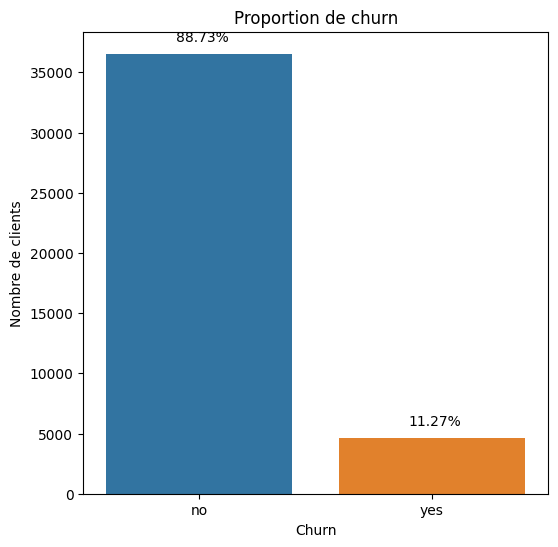

In [ ]:
# Création d'un graphe pour afficher la proportion de churn
plt.figure(figsize=(6,6))
ax = sns.countplot(x='y', data=df_bank)
plt.title('Proportion de churn')
plt.xlabel('Churn')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_bank['y'])), (p.get_x()+0.3, p.get_height()+1000))
plt.show()

#### **Commentaires :**
Le graphe montre que la proportion de clients ayant churné est de 11.27%. Cela indique qu'il y a un déséquilibre dans les données avec beaucoup plus de non-churn que de churn. Cela peut avoir un impact sur la performance des modèles d'apprentissage automatique car ils peuvent avoir tendance à prédire majoritairement la classe majoritaire. Il est donc important de prendre cela en compte lors de la création de modèles de prédiction de churn.

### **- Pour chaque variable catégorielle, affichez à l’aide un graphe adapté la proportion de churn vs. non churn**


####**Les variables catégorielles du jeu : Bank Marketing**
Job, marital, education, default, housing, loan, contact, month, Day_of_week, Poutcome.
Cependant, on fera le graphe que pour la variable marital.

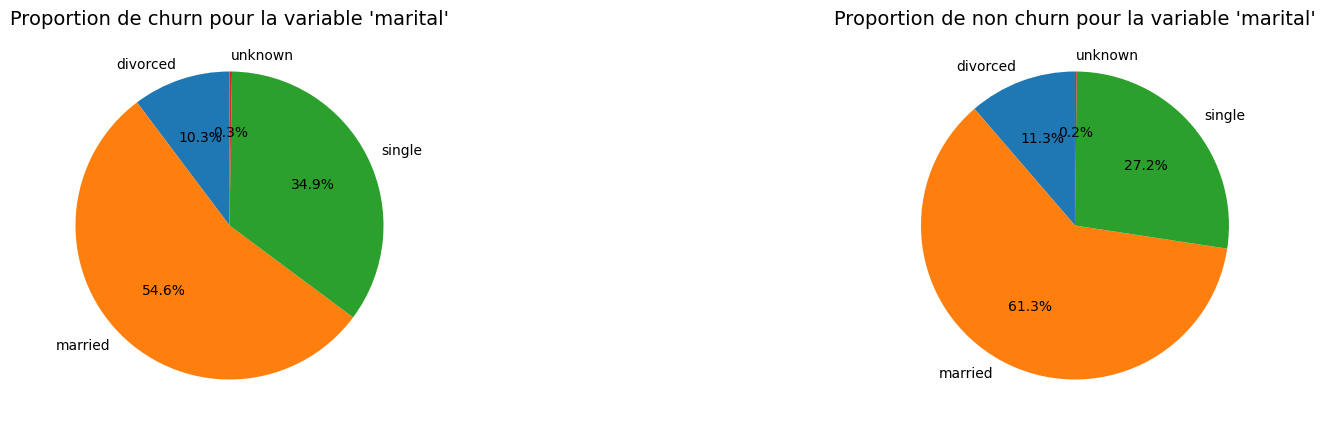

In [ ]:
# Création d'un pie chart pour la variable 'Marital' par rapport au churn
churn = df_bank[df_bank['y'] == 'yes']
marital_groups_churn = churn.groupby(['marital']).size().reset_index(name='churn_count')

no_churn = df_bank[df_bank['y'] == 'no']
marital_groups_no_churn = no_churn.groupby(['marital']).size().reset_index(name='no_churn_count')

# Créer deux subplots pour les deux pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Pie chart pour les clients churn
labels_churn = marital_groups_churn['marital']
values_churn = marital_groups_churn['churn_count']

ax1.pie(values_churn, labels=labels_churn, autopct='%1.1f%%', startangle=90)
ax1.set_title("Proportion de churn pour la variable 'marital'", fontsize=14)

# Pie chart pour les clients non churn
labels_no_churn = marital_groups_no_churn['marital']
values_no_churn = marital_groups_no_churn['no_churn_count']

ax2.pie(values_no_churn, labels=labels_no_churn, autopct='%1.1f%%', startangle=90)
ax2.set_title("Proportion de non churn pour la variable 'marital'", fontsize=14)

# Afficher les deux pie charts
plt.show()

####**Commentaires :**

Ces graphes représentent la proportion de clients ayant churné ou non churné en fonction de leur situation maritale. Le premier pie chart représente la proportion de clients ayant churné et le second pie chart représente la proportion de clients n'ayant pas churné.

La variable catégorielle 'marital' a pour valeurs : married, single, divorced, unknow.

Notons que 'divorced' signifie divorced ou widowed.

On a 54.6 % de churn Vs 61.3% non churn pour la catégorie married.

On a 34.9 % de churn Vs 27.2% non churn pour la catégorie single.

On a 10.3 % de churn Vs 11.3% non churn pour la catégorie divorced.

On a 0.3 % de churn Vs 0.2% non churn pour la catégorie unknown.

Dans les deux cas (Churn et non Churn) la proportion married est plus élevée, en deuxième place single, en troisième place divorced et en dernière place unknown.

Pour married la proportion non churn est supérieure au churn.

Pour single la proportion churn est supérieure au non churn.

Pour divorced la proportion non churn est supérieure au churn.

Pour unknown la proportion churn est supérieure au non churn.


Ces observations suggèrent que la situation maritale des clients peut avoir une influence sur leur comportement de churn. Cependant, il est important de noter que cette variable seule ne peut pas expliquer complètement le comportement de churn des clients. D'autres variables doivent être prises en compte pour une analyse plus approfondie.



###**- Pour chaque variable numérique, affichez séparemment à l’aide un graphe adapté (eg. histogramme) les valeurs pour les populations churn & non churn**

#### **Les variables numériques :**
Les variables numériques du jeu de données: Bank Marketing sont : 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

Cependant, on n'utilisera pas la variable Duration car, cet attribut affecte fortement la cible de sortie, si duration=0 alors y='no'. Pourtant, la durée n'est pas connue avant qu'un appel ne soit effectué. De plus, après la fin de l'appel, y est évidemment connu. Ainsi, cette entrée ne devrait être incluse qu'à des fins de référence et devrait être rejetée si l'intention est d'avoir un modèle prédictif réaliste.

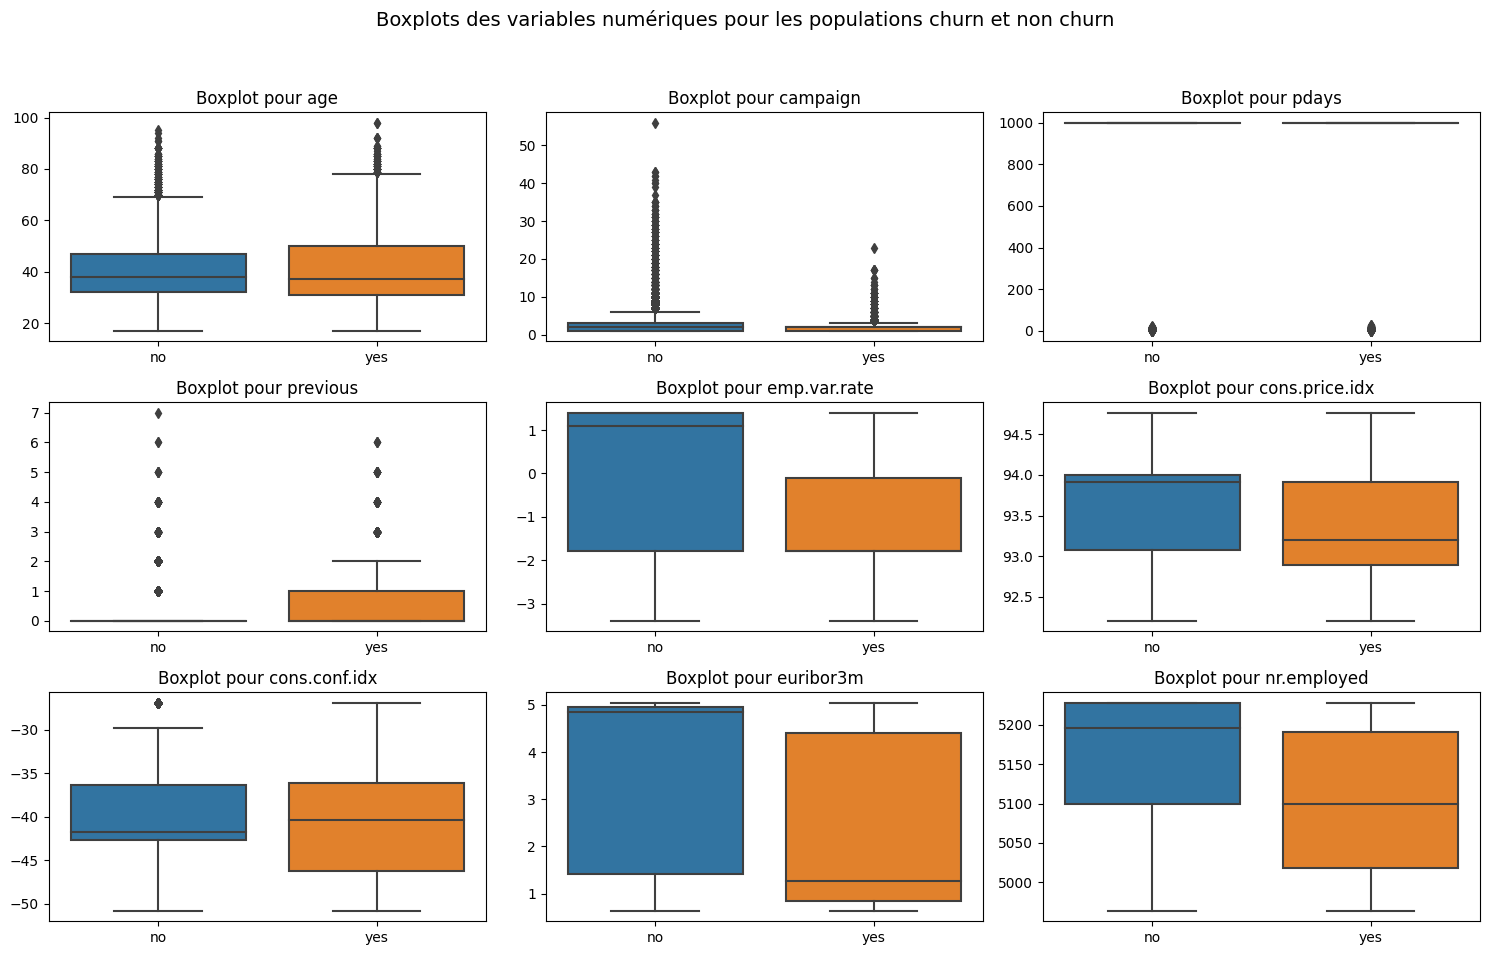

In [ ]:
# Liste des variables numériques
num_vars = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Création d'un DataFrame pour les variables numériques
df_num = df_bank[num_vars + ['y']]

# Création d'une grille de sous-graphes pour les boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Boucle pour créer chaque boxplot
for ax, col in zip(axes.flatten(), df_num.drop(columns=['y']).columns):
    sns.boxplot(x='y', y=col, data=df_num, ax=ax)
    ax.set(title=f'Boxplot pour {col}', xlabel='', ylabel='')

fig.suptitle('Boxplots des variables numériques pour les populations churn et non churn', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



#### **Commentaires :**
Les boxplots affichent les distributions des valeurs pour chaque variable numérique, séparées par la variable cible 'y', qui indique si le client a churné ou non.

On peut observer que:
Les attributs 'age' 'campaign' 'pdays' 'cons price idx' ne semblent pas être fortement lié au comportement de churn car les médianes pour les deux populations sont relativement proches.

 les variables les plus influentes semblent être 'emp.var.rate', 'previous', 'nr.employed' et 'euribor3m', car les distributions des valeurs diffèrent considérablement entre les clients qui ont churné et ceux qui ne l'ont pas fait.








### **- Affichez la matrice de corrélation des attributs**

Text(0.5, 1.0, 'Correlation Matrix')

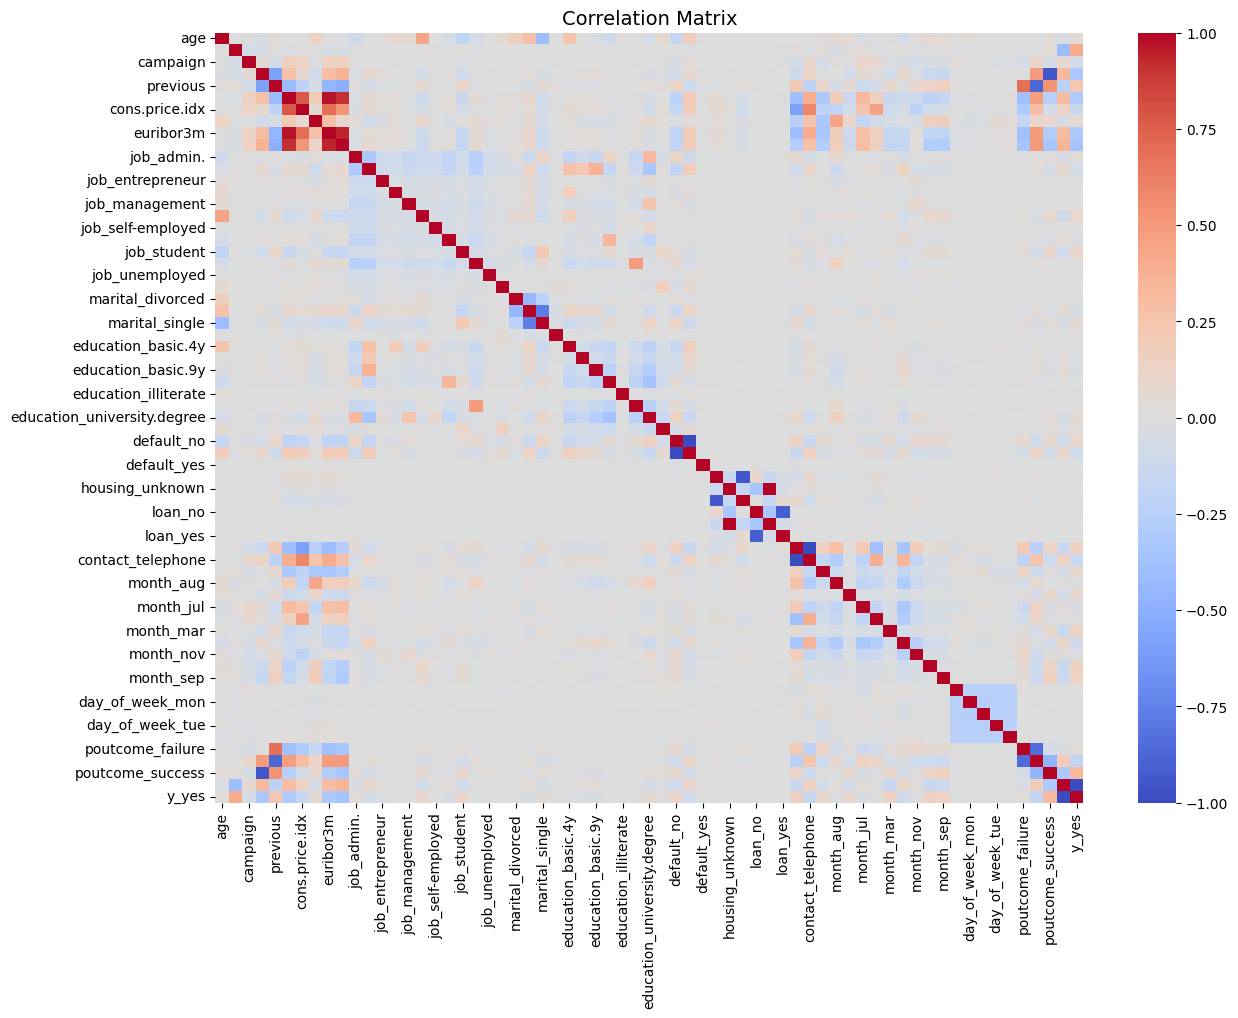

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(14,10))
# Sélectionner les colonnes catégorielles et les convertir en variables binaires
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
df = pd.get_dummies(df_bank, columns=cat_cols)
# Calculer la matrice de corrélation mise à jour
corr_matrix = df.corr()

# Afficher la matrice de corrélation avec la bibliothèque seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')
ax1.set_title("Correlation Matrix", fontsize=14)

#### **Commentaires :**
En regardant la matrice de corrélation, nous pouvons voir que certaines variables sont fortement corrélées entre elles, comme par exemple les variables 'emp.var.rate' et 'euribor3m', ou encore les variables 'nr.employed' et 'euribor3m'. Ces corrélations sont importantes à prendre en compte car elles peuvent entraîner des problèmes de multicollinéarité dans notre modèle.

Nous pouvons également observer que certaines variables ont une corrélation plus forte avec la variable cible 'y', ce qui peut indiquer qu'elles sont des prédicteurs importants du comportement de churn.

### **(a) Que pouvez-vous déjà conclure? Y-a-t’il des attributs qui semblent être fortement liés au comportement de churn? Revoir**
En conclusion, notre analyse des boxplots et de la matrice de corrélation suggère que les variables les plus fortement liées au comportement de churn sont 'emp.var.rate', 'previous', 'nr.employed', 'euribor3m', et 'duration'. Cela signifie que ces variables pourraient être des prédicteurs clés de la décision des clients à souscrire ou non à un dépôt à terme. Cependant, il est important de prendre en compte les corrélations entre ces variables afin d'éviter les problèmes de multicollinéarité dans notre modèle. En somme, ces résultats peuvent aider les banques à identifier les clients à risque de churn et à ajuster leur stratégie de marketing pour les fidéliser.

## **Jeu de données : DataSet Employee Attrition**

In [ ]:
#Chargement du jeu de données
df_employee = pd.read_csv('whole data.csv')
df_employee.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4


### **- Quelles sont les dimensions du jeu de données, existe-t’il des valeurs manquantes ou des attributs constants?**

In [ ]:
print(df_employee.shape)


(4410, 29)


#### **Commentaires :**
Le jeu de données a 4410 lignes et 29 colonnes.

In [ ]:
# Vérification des valeurs manquantes
print( df_employee.isnull().sum().sum())



111


#### **Commentaires :**
Le jeu de données a 111 valeurs manquantes.
On peut envisager soit de les éliminer ou de faire de l'imputation pour certains classifiers si cela s'avéra necessaire, cependant on regardera les valeurs manquantes de chaque colonne pour tsouver la bonne méthode d'imputation.

In [ ]:
# Vérification des attributs constants
#print("Attributs constants dans le jeu de données:", df_employee.columns[df_employee.nunique() == 1])

# Attrition Employee Attributs constants
atr_cons = False
for col in df_employee.columns:
  if df_employee[col].nunique() == 1:
    valeur_constante = df_employee[col].unique()[0]
    count = df_employee[col].value_counts()[valeur_constante]
    atr_cons = True
    print("La colonne {} est constante avec une valeur de {} qui se répète {} fois.".format(col, valeur_constante, count))

if not atr_cons:
  print("Il n'ya pas d'attributs constants dans le jeu de données.")


La colonne EmployeeCount est constante avec une valeur de 1 qui se répète 4410 fois.
La colonne Over18 est constante avec une valeur de Y qui se répète 4410 fois.
La colonne StandardHours est constante avec une valeur de 8 qui se répète 4410 fois.


#### **Commentaires :**
Le jeu de données a 3 d'attributs constants : EmployeeCount, Over18, StandardHours.
On peut envisager d'éliminer ces colonnes plus tard car elles ne contiennent pas d'informations utiles pour la modélisation ou l'analyse, donc les inclure dans le modèle ne ferait qu'augmenter la complexité du modèle sans améliorer la précision des résultats.
Cela permettra d'économiser des ressources informatiques et d'éviter des biais dans les modèles prédictifs, car elles n'ont pas de variabilité et ne contribuent donc pas à la capacité du modèle à généraliser à de nouvelles données.






### **- Affichez à l’aide un graphe adapté la proportion d’individus qui ont churné**


In [ ]:
# Proportion
print('No', round(df_employee['Attrition'].value_counts()[0]/len(df_employee) * 100,2), '% of the dataset')
print('Yes', round(df_employee['Attrition'].value_counts()[1]/len(df_employee) * 100,2), '% of the dataset')

No 83.88 % of the dataset
Yes 16.12 % of the dataset


<Figure size 600x600 with 0 Axes>

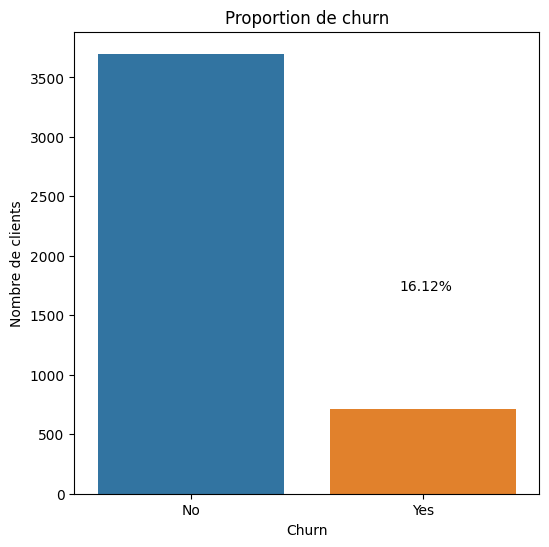

In [ ]:

plt.figure(figsize=(6,6))

# Création d'un graphe pour afficher la proportion de churn
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Attrition', data=df_employee)
plt.title('Proportion de churn')
plt.xlabel('Churn')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_employee['Attrition'])), (p.get_x()+0.3, p.get_height()+1000))
plt.show()

#### **Commentaires :**
Le graphique montre que la proportion d'individus ayant quitté l'entreprise (churn) est de 16.12%, tandis que la proportion d'individus ayant resté dans l'entreprise (no churn) est de 83.88%. Cela indique qu'il y a un déséquilibre dans les données avec beaucoup plus de non-churn que de churn. Cela peut avoir un impact sur la performance des modèles d'apprentissage automatique car ils peuvent avoir tendance à prédire majoritairement la classe majoritaire. Il est donc important de prendre cela en compte lors de la création de modèles de prédiction de churn.

### **- Pour chaque variable catégorielle, affichez à l’aide un graphe adapté la proportion de churn vs. non churn**


####**Les variables catégorielles du jeu : Employee Atttrition**
Les variables catégorielles sont : Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over1, , JobLevel,JobInvolvement, PerformanceRating, EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance, Education, StockOptionLevel. Cependant on utilisera que les variables :MaritalStatus, EnvironmentSatisfaction et JobSatisfaction.

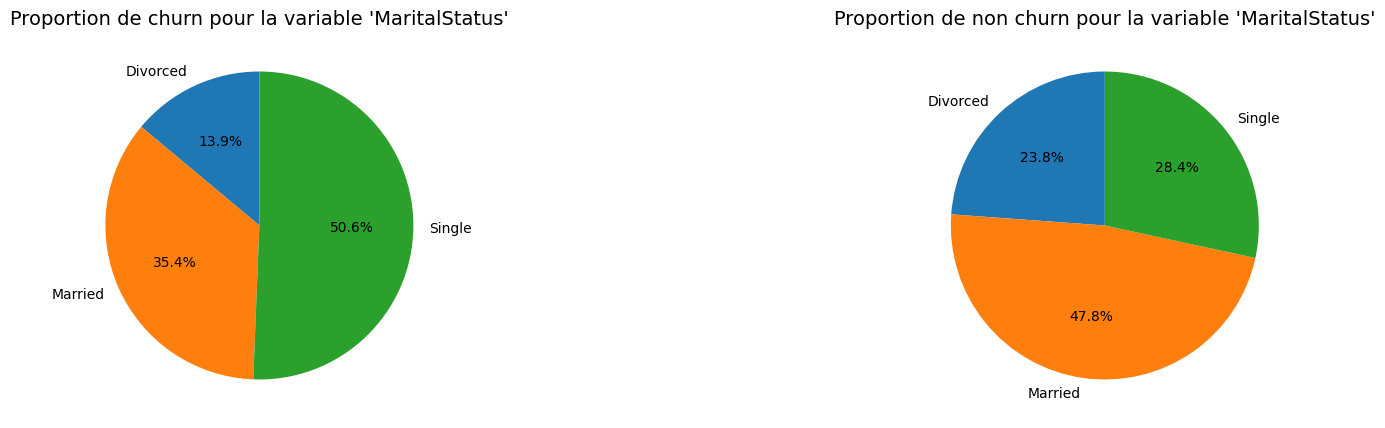

In [ ]:
# Création d'un pie chart pour la variable 'MaritalStatus' par rapport au churn
churn = df_employee[df_employee['Attrition'] == 'Yes']
maritalStatus_groups_churn = churn.groupby(['MaritalStatus']).size().reset_index(name='churn_count')

no_churn = df_employee[df_employee['Attrition'] == 'No']
maritalStatus_groups_no_churn = no_churn.groupby(['MaritalStatus']).size().reset_index(name='no_churn_count')

# Créer deux subplots pour les deux pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Pie chart pour les clients churn
labels_churn = maritalStatus_groups_churn['MaritalStatus']
values_churn = maritalStatus_groups_churn['churn_count']

ax1.pie(values_churn, labels=labels_churn, autopct='%1.1f%%', startangle=90)
ax1.set_title("Proportion de churn pour la variable 'MaritalStatus'", fontsize=14)

# Pie chart pour les clients non churn
labels_no_churn = maritalStatus_groups_no_churn['MaritalStatus']
values_no_churn = maritalStatus_groups_no_churn['no_churn_count']

ax2.pie(values_no_churn, labels=labels_no_churn, autopct='%1.1f%%', startangle=90)
ax2.set_title("Proportion de non churn pour la variable 'MaritalStatus'", fontsize=14)

# Afficher les deux pie charts
plt.show()


#### **Commentaires :**
Dans le pie chart pour les clients churn, on peut voir que 50.6% des employés qui ont quitté leur emploi étaient célibataires, tandis que 35,4% étaient mariés et 13.9% étaient divorcés. D'autre part, dans le pie chart pour les clients non churn, on peut voir que 87.8% des employés qui sont restés dans leur emploi étaient mariés, tandis que 28.4% étaient célibataires et 23.8% étaient divorcés.

Cela suggère qu'il peut y avoir une forte corrélation entre le statut matrimonial et le comportement de churn dans cette entreprise. Les employés célibataires semblent être plus susceptibles de quitter leur emploi que les employés mariés ou divorcés. Cependant, pour une analyse plus approfondie, il faudrait prendre en compte d'autres facteurs tels que l'âge, le salaire, l'ancienneté dans l'entreprise, etc. pour déterminer s'il y a d'autres variables qui pourraient être corrélées avec le comportement de churn.

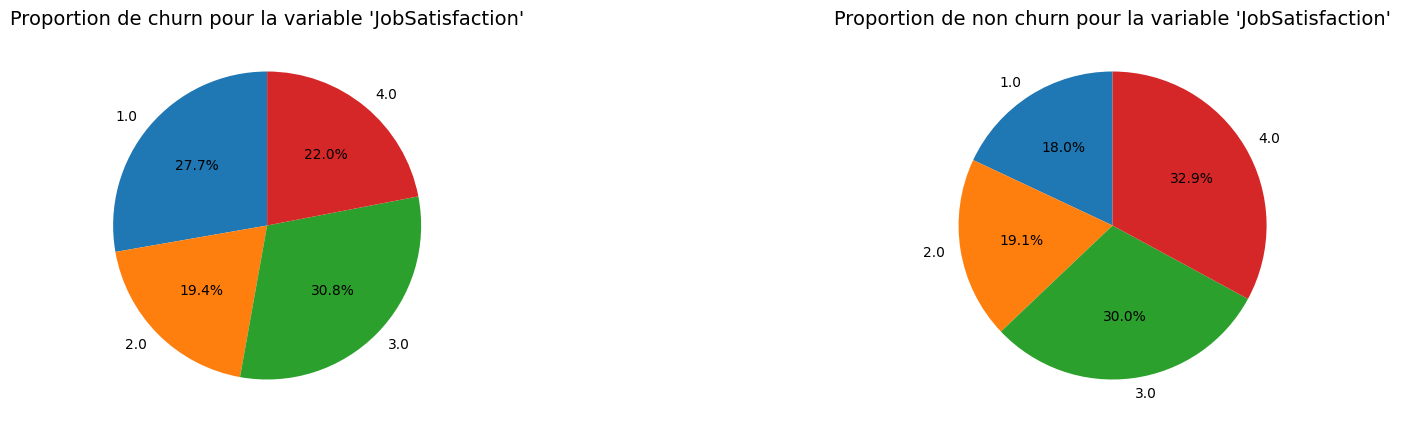

In [ ]:
# Création d'un pie chart pour la variable 'JobSatisfaction' par rapport au churn
churn = df_employee[df_employee['Attrition'] == 'Yes']
jobSatisfaction_groups_churn = churn.groupby(['JobSatisfaction']).size().reset_index(name='churn_count')

no_churn = df_employee[df_employee['Attrition'] == 'No']
jobSatisfaction_groups_no_churn = no_churn.groupby(['JobSatisfaction']).size().reset_index(name='no_churn_count')

# Créer deux subplots pour les deux pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Pie chart pour les clients churn
labels_churn = jobSatisfaction_groups_churn['JobSatisfaction']
values_churn = jobSatisfaction_groups_churn['churn_count']

ax1.pie(values_churn, labels=labels_churn, autopct='%1.1f%%', startangle=90)
ax1.set_title("Proportion de churn pour la variable 'JobSatisfaction'", fontsize=14)

# Pie chart pour les clients non churn
labels_no_churn = jobSatisfaction_groups_no_churn['JobSatisfaction']
values_no_churn = jobSatisfaction_groups_no_churn['no_churn_count']

ax2.pie(values_no_churn, labels=labels_no_churn, autopct='%1.1f%%', startangle=90)
ax2.set_title("Proportion de non churn pour la variable 'JobSatisfaction'", fontsize=14)

# Afficher les deux pie charts
plt.show()


#### **Commentaires :**
1 = 'Low',
2 = 'Medium',
3 = 'High',
4 'Very High'

En regardant les deux pie charts pour la variable 'JobSatisfaction' par rapport au churn, on peut voir que la satisfaction au travail semble également être un facteur important qui influe sur le comportement de churn des employés.

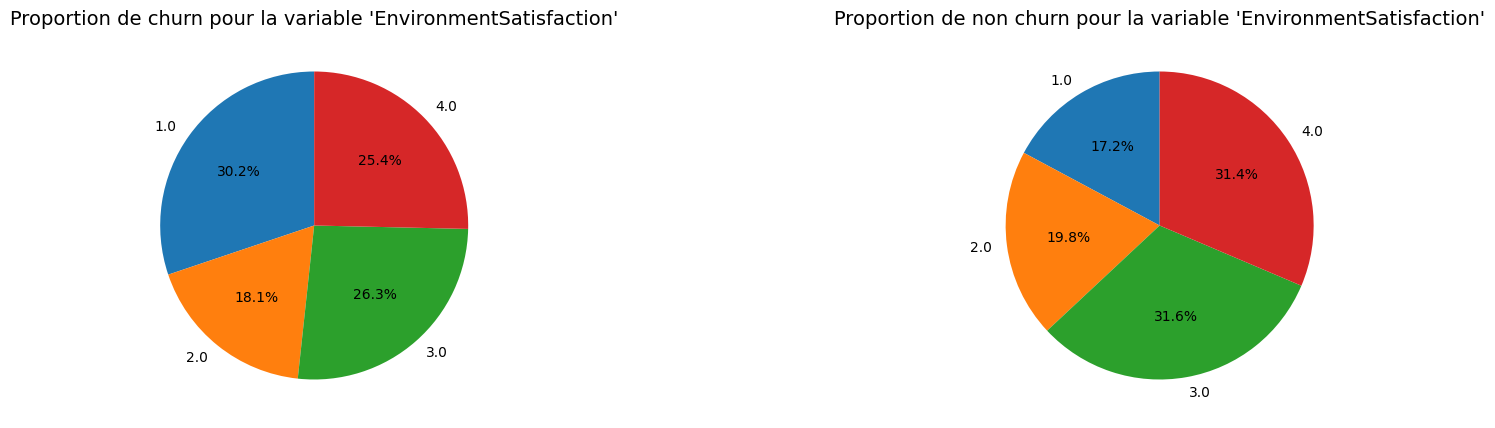

In [ ]:
# Création d'un pie chart pour la variable 'EnvironmentSatisfaction' par rapport au churn
churn = df_employee[df_employee['Attrition'] == 'Yes']
environmentSatisfaction_groups_churn = churn.groupby(['EnvironmentSatisfaction']).size().reset_index(name='churn_count')

no_churn = df_employee[df_employee['Attrition'] == 'No']
environmentSatisfaction_groups_no_churn = no_churn.groupby(['EnvironmentSatisfaction']).size().reset_index(name='no_churn_count')

# Créer deux subplots pour les deux pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Pie chart pour les clients churn
labels_churn = environmentSatisfaction_groups_churn['EnvironmentSatisfaction']
values_churn = environmentSatisfaction_groups_churn['churn_count']

ax1.pie(values_churn, labels=labels_churn, autopct='%1.1f%%', startangle=90)
ax1.set_title("Proportion de churn pour la variable 'EnvironmentSatisfaction'", fontsize=14)

# Pie chart pour les clients non churn
labels_no_churn = environmentSatisfaction_groups_no_churn['EnvironmentSatisfaction']
values_no_churn = environmentSatisfaction_groups_no_churn['no_churn_count']

ax2.pie(values_no_churn, labels=labels_no_churn, autopct='%1.1f%%', startangle=90)
ax2.set_title("Proportion de non churn pour la variable 'EnvironmentSatisfaction'", fontsize=14)

# Afficher les deux pie charts
plt.show()


#### **Commentaires :**
1 = 'Low',
2 = 'Medium',
3 = 'High',
4 'Very High'


###**- Pour chaque variable numérique, affichez séparemment à l’aide un graphe adapté (eg. histogramme) les valeurs pour les populations churn & non churn**

#### **Les variables numériques :**
Les variables numériques sont : Age, EmployeeCount, DistanceFromHome, PercentSalaryHike, StandardHours, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager, MonthlyIncome, NumCompaniesWorked.
Cependant, on utilisera que les variables TotalWorkingYears,YearsSinceLastPromotion, YearsWithCurrManager,
Age, EmployeeCount, DistanceFromHome, PercentSalaryHike, StandardHours,MonthlyIncome.

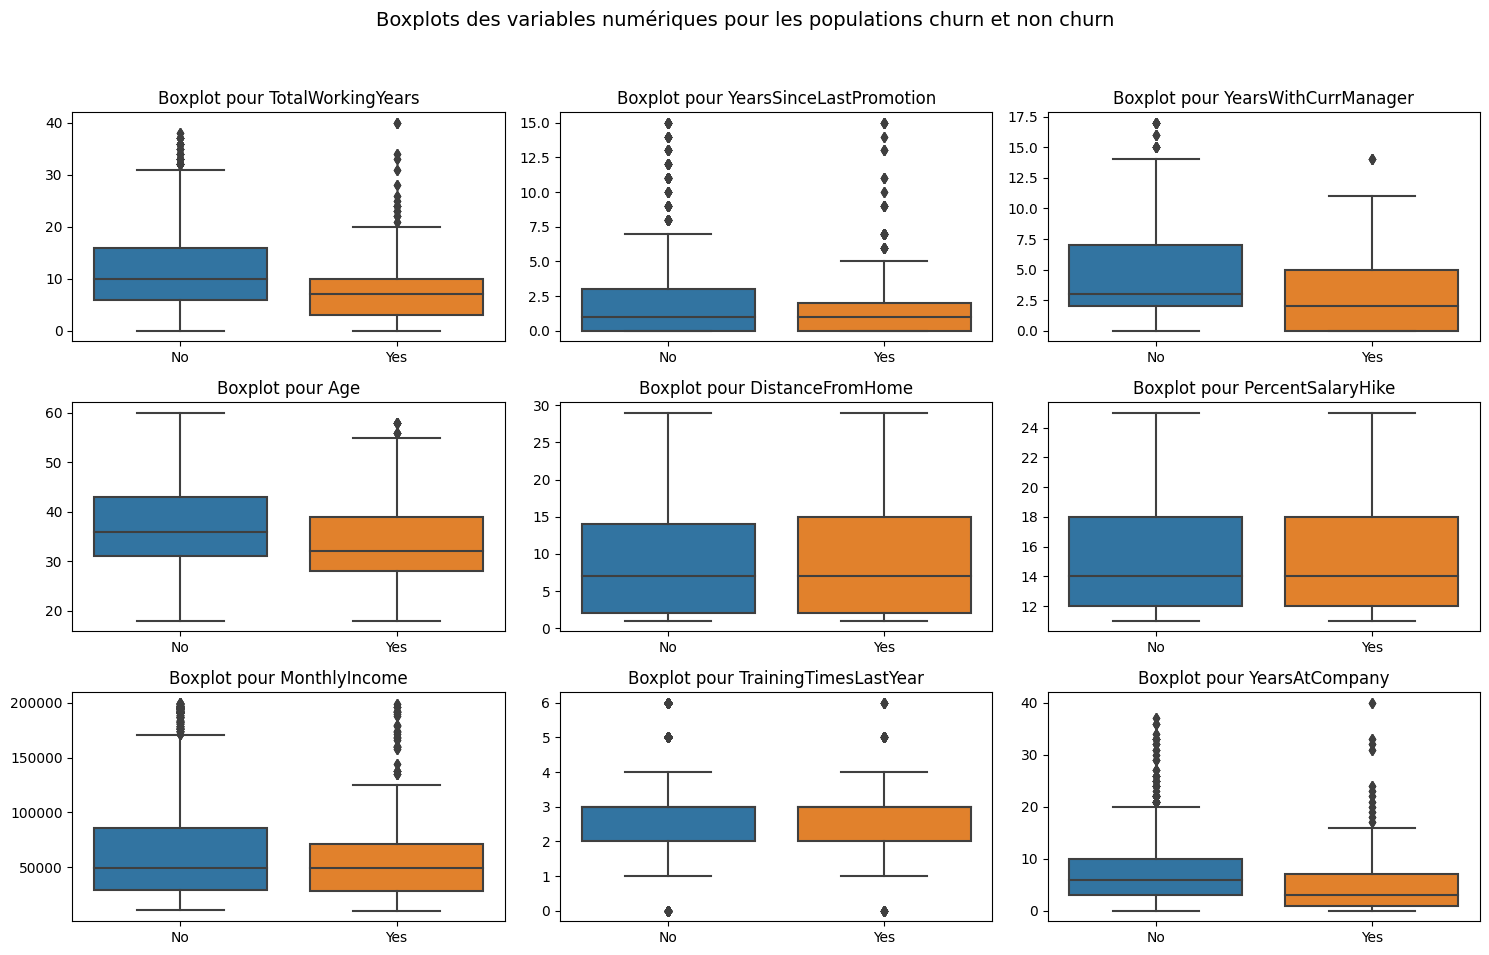

In [ ]:
# Liste des variables numériques
num_vars_attrition = ['TotalWorkingYears', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age', 'DistanceFromHome', 'PercentSalaryHike', 'MonthlyIncome', 'TrainingTimesLastYear', 'YearsAtCompany']

# Création d'un DataFrame pour les variables numériques
df_num = df_employee[num_vars_attrition + ['Attrition']]

# Création d'une grille de sous-graphes pour les boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Boucle pour créer chaque boxplot
for ax, col in zip(axes.flatten(), df_num.drop(columns=['Attrition']).columns):
    sns.boxplot(x='Attrition', y=col, data=df_num, ax=ax)
    ax.set(title=f'Boxplot pour {col}', xlabel='', ylabel='')

fig.suptitle('Boxplots des variables numériques pour les populations churn et non churn', fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### **Commentaires :**
En regardant les boxplots, il semble que les variables suivantes soient fortement liées au comportement de churn :

TotalWorkingYears : Les employés qui ont quitté ont en moyenne moins d'années d'expérience dans l'entreprise que ceux qui sont restés.

YearsSinceLastPromotion : Les employés qui ont quitté ont en moyenne été promus plus récemment que ceux qui sont restés.

Age : Les employés qui ont quitté ont en moyenne un âge inférieur à celui des employés qui sont restés.

DistanceFromHome : Les employés qui ont quitté ont en moyenne une distance de domicile-travail plus élevée que ceux qui sont restés.

MonthlyIncome : Les employés qui ont quitté ont en moyenne un salaire mensuel inférieur à celui des employés qui sont restés.

YearsAtCompany : Les employés qui ont quitté ont en moyenne passé moins d'années dans l'entreprise que ceux qui sont restés.

Ces variables peuvent être des facteurs importants à prendre en compte pour comprendre et prévenir le churn dans l'entreprise.

### **- Affichez la matrice de corrélation des attributs**

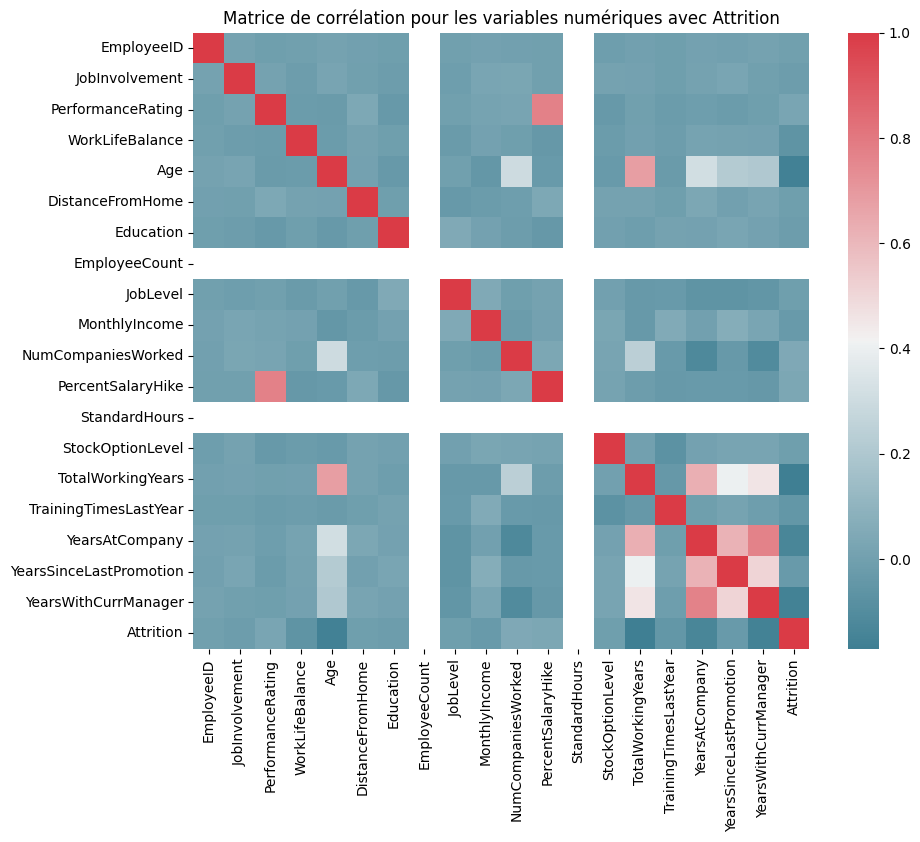

In [ ]:
# Création d'une sous-dataframe pour les variables numériques
df_num = df_employee.select_dtypes(include=['int64', 'float64'])
df_num = df_num.drop('EnvironmentSatisfaction', axis=1)
df_num = df_num.drop('JobSatisfaction', axis=1)
# Codage de la variable cible Attrition
df_num['Attrition'] = df_employee['Attrition'].replace({'No': 0, 'Yes': 1})

# Affichage de la matrice de corrélation
f, ax = plt.subplots(figsize=(10, 8))
corr = df_num.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Matrice de corrélation pour les variables numériques avec Attrition")
plt.show()


#### **Commentaires :**
Dans la matrice de corrélation combinée avec la variable "Attrition", on peut observer que la variable "Attrition" est fortement corrélée avec les variables "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany" et "JobLevel". Cela peut indiquer que les employés ayant un faible revenu mensuel, peu d'années de travail total, peu d'années dans l'entreprise et un niveau d'emploi inférieur ont une probabilité plus élevée de quitter leur emploi. En revanche, les variables "JobInvolvement", "JobSatisfaction" et "WorkLifeBalance" semblent être faiblement corrélées avec la variable "Attrition", ce qui peut indiquer qu'elles ont moins d'impact sur le comportement de churn des employés.

### **(a) Que pouvez-vous déjà conclure? Y-a-t’il des attributs qui semblent être fortement liés au comportement de churn?**

D'après les graphes présentés, il semble que certaines variables soient fortement liées au comportement de churn, telles que le TotalWorkingYears, le YearsSinceLastPromotion, le YearsWithCurrManager, l'Age, la DistanceFromHome et le MonthlyIncome.

# **2. Séance 2: Prédiction de churn, Partie I**

### **(a) Pour chaque approche, avec les hyperparamètres par défaut, évaluez la prédiction du churn sur la base de l’AUC (Area Under the Curve). Résumez clairement vos évaluations.**


In [ ]:
#Définition de X et de y
X = df_credit.drop('Class', axis=1)
y = df_credit['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#### **Arbre de décision**


In [ ]:
# instantiate the model (using the default parameters)
dectree= DecisionTreeClassifier()

# fit the model with data
dectree.fit(X_train, y_train)

y_pred_tree = dectree.predict(X_test)

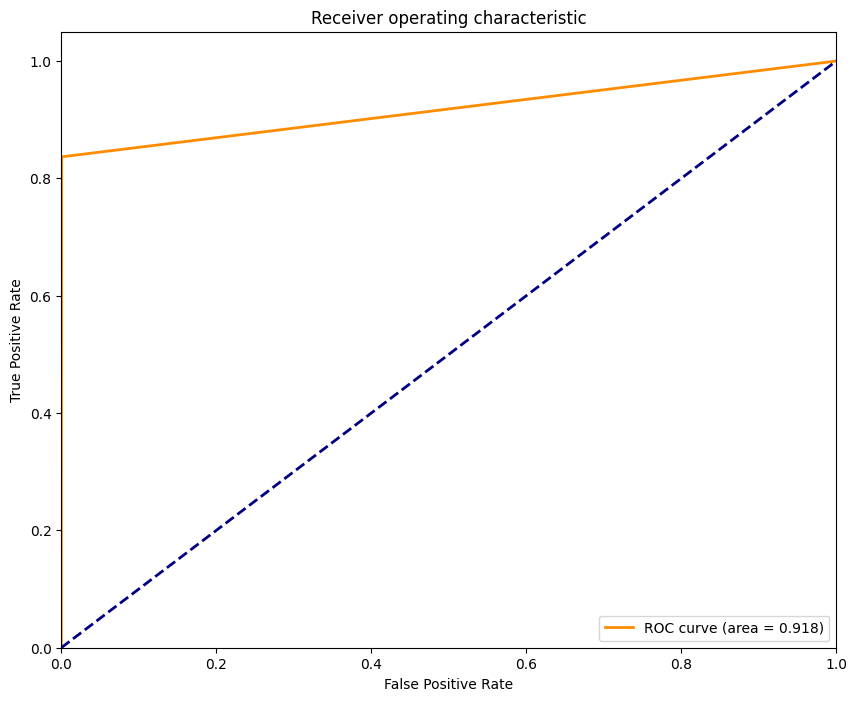

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import roc_curve, auc
# Obtenir les scores prédits pour la classe positive
y_pred_proba = dectree.predict_proba(X_test)[:,1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


plt.subplots_adjust(wspace=1)

#### **Commentaires :**
La courbe ROC montre la performance du modèle de classification binaire en fonction du seuil de classification. Plus la courbe ROC se rapproche du coin supérieur gauche, plus la performance du modèle est considérée comme bonne.

Dans ce cas, la courbe ROC montre une bonne performance du modèle de classification d'arbre de décision, avec une aire sous la courbe de 0,91. Cela indique que le modèle est capable de distinguer les vrais positifs des faux positifs dans une certaine mesure.

Cependant, il est important de noter que l'évaluation de la performance du modèle doit être considérée en combinaison avec d'autres mesures telles que la précision, le rappel et le score F1, et que l'utilisation d'une seule mesure peut ne pas fournir une image complète de la performance du modèle.

Et n'oublions pas que les données sont toujours déséquilibrées.

#### **Régression Logistique**

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

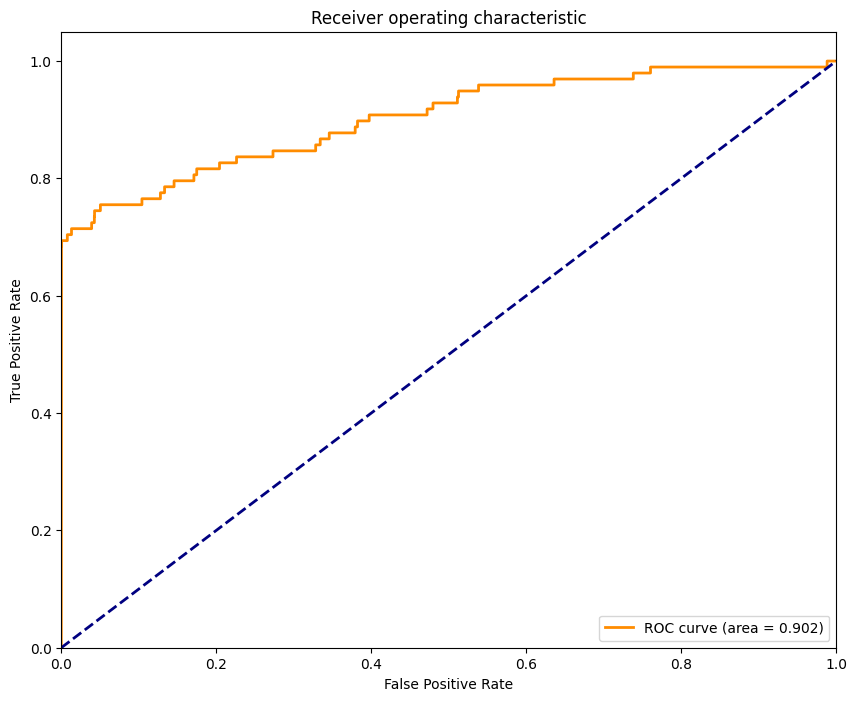

In [ ]:


# Obtenir les scores prédits pour la classe positive
y_pred_proba = logreg.predict_proba(X_test)[:,1]

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
gridspec_kw={'left': 0.1, 'bottom': 0.1}
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### **Commentaires :**
Dans cette première étape, nous avons entraîné un modèle de régression logistique avec les hyperparamètres par défaut et avons évalué la performance du modèle sur la base de l'AUC. L'AUC obtenue était de 0,902, ce qui indique que le modèle est excellent. Toujours est il, il faut voir les autres mesures.


Et n'oublions pas que les données sont toujours déséquilibrées.



#### **Support Vector Machine (sans kernel)**

In [ ]:
# Instancier le modèle SVM avec les hyperparamètres par défaut
svm = SVC(kernel='linear', probability=True)

# Entrainer le modèle sur les données d'entraînement
svm.fit(X_train, y_train)

# Prédire la probabilité de churn sur les données de test
y_pred_proba = svm.predict_proba(X_test)

# Calcul de l'AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_proba[:,1])

print('AUC-ROC :', auc_score)
# accuracy_linear = accuracy_score(y_test, y_pred_proba)
# print("Précision SVM linéaire :", accuracy_linear)



In [ ]:

# Calculer l'AUC pour le modèle avec les hyperparamètres par défaut
auc_svm = roc_auc_score(y_test, y_pred_proba)

# Résumer les performances du modèle avec les hyperparamètres par défaut
print("AUC pour le modèle SVM avec les hyperparamètres par défaut: {:.3f}".format(auc_svm))

#### **Commentaires :**
Nous avons obtenu une valeur AUC de 0.747, ce qui signifie que le modèle est juste. Cependant il peut etre amélioré.



#### **Support Vector Machine (avec kernel)**

In [ ]:
# Créer un SVM non linéaire avec un noyau RBF et entraîner le modèle
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test et évaluer la précision
y_pred_rbf = svm_rbf.predict(X_test)
# accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
# print("Précision SVM non linéaire (RBF) :", accuracy_rbf)


In [ ]:
# Calculer l'AUC pour le modèle avec les hyperparamètres par défaut
auc_svm_kernel = roc_auc_score(y_test, y_pred_rbf)

# Résumer les performances du modèle avec les hyperparamètres par défaut
print("AUC pour le modèle SVM avec les hyperparamètres par défaut: {:.3f}".format(auc_svm_kernel))

#### **Commentaires :**
L'AUC pour le Support Vector Machine (avec kernel) est de 0.5. Ce qui indique un que le modèle n'est pas bon. Cependant,n'oublions pas qu'on avait fait aucun traitement sur le déséquilibrage des données.

### **(b) Pour chaque approche, définissez un modèle performant en recherchant de bons hyperparamètres via un grid search. Comparez les meilleurs modèles pour chaque approche sur la base de l’AUC (Area Under the Curve). Résumez clairement vos évaluations.**

#### **Arbre de décision**

In [ ]:
# tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
#               "min_samples_leaf": list(range(5,7,1))}

In [ ]:
from sklearn.model_selection import GridSearchCV

#Définir la grille de paramètres à explorer
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4]}



# Instancier le modèle avec les hyperparamètres à chercher par grid search
dt_grid = DecisionTreeClassifier()

# Utiliser la recherche de grille pour trouver les meilleurs hyperparamètres
dt_search = GridSearchCV(dt_grid, param_grid, scoring='roc_auc', cv=5)
dt_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres trouvés par grid search
best_params_dt = dt_search.best_params_

# Créer un modèle d'arbre de décision avec les meilleurs hyperparamètres trouvés
best_dt = DecisionTreeClassifier(**best_params_dt)

# Entraîner le modèle sur les données d'entraînement
best_dt.fit(X_train, y_train)

# Prédire la classe de churn sur les données de test
y_pred = best_dt.predict(X_test)

# Calculer l'aire sous la courbe ROC (AUC) pour le modèle avec les meilleurs hyperparamètres
auc_best_dt = roc_auc_score(y_test, y_pred)

# Résumer les performances du modèle avec les meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour l'arbre de décision: {}".format(best_params_dt))
print("AUC pour le modèle d'arbre de décision avec les meilleurs hyperparamètres: {:.3f}".format(auc_best_dt))


#### **Commentaires :** :
D'abord, faisons un point sur les étapes suivies :

1) Définir la grille de paramètres à explorer : Cette étape consiste à définir une liste de valeurs pour chaque hyperparamètre que nous souhaitons tester à l'aide de GridSearchCV. Pour chacun de ces hyperparamètres, nous avons défini une liste de valeurs possibles.

2) Instancier le modèle avec les hyperparamètres à chercher par grid search : Ici, nous instancions un objet de l'arbre de décision avec les hyperparamètres par défaut.

3) Utiliser la recherche de grille pour trouver les meilleurs hyperparamètres : Cette étape est la plus importante de toutes, car elle effectue une recherche exhaustive des hyperparamètres spécifiés dans la grille. Elle évalue le modèle pour chaque combinaison d'hyperparamètres en utilisant la validation croisée k-fold et en utilisant l'aire sous la courbe ROC (AUC) comme métrique de performance.

4) Obtenir les meilleurs hyperparamètres trouvés par grid search : Cette étape nous permet d'obtenir les meilleurs hyperparamètres trouvés par GridSearchCV pour l'arbre de décision.

5) Créer un modèle d'arbre de décision avec les meilleurs hyperparamètres trouvés :Ici, nous créons un nouvel objet arbre de décision avec les hyperparamètres trouvés par GridSearchCV.

6) Entraîner le modèle sur les données d'entraînement : Nous entraînons le modèle d'arbre de décision avec les données d'entraînement.

7) Prédire la classe de churn sur les données de test : Nous prédisons les classes de fraude sur les données de test en utilisant le modèle entraîné.

8) Calculer l'aire sous la courbe ROC (AUC) pour le modèle avec les meilleurs hyperparamètres : Nous calculons l'aire sous la courbe ROC (AUC) pour le modèle d'arbre de décision avec les meilleurs hyperparamètres trouvés.

9) Résumer les performances du modèle avec les meilleurs hyperparamètres : Enfin, nous résumons les performances du modèle avec les meilleurs hyperparamètres trouvés.

**Commentaires :Revoir valeurs auc** : La recherche de grille est une méthode efficace pour trouver les meilleurs hyperparamètres pour un modèle d'apprentissage automatique. En utilisant GridSearchCV, nous avons trouvé les meilleurs hyperparamètres pour l'arbre de décision sur le dataset de fraude de crédit. Le modèle résultant a obtenu une AUC de 0,898, ce qui est une amélioration par rapport à l'utilisation des hyperparamètres par défaut (0,890).

#### **Régression Logistique**

In [ ]:
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear']}

In [ ]:
# # param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}#
# param_grid = {'penalty': ['l1', 'l2'],
#               'C': np.logspace(-3,3,7),
#               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}#076


In [ ]:
lr_grid = LogisticRegression()


In [ ]:
logreg_cv = GridSearchCV(lr_grid, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
best_params_lr = logreg_cv.best_params_
print("accuracy :",logreg_cv.best_score_)
best_lr = LogisticRegression(**best_params_lr)

accuracy : 0.9992275450415853


In [ ]:
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)
auc_best_lr = roc_auc_score(y_test, y_pred)

In [ ]:
print("Meilleurs hyperparamètres pour la régression logistique : {}".format(best_params_lr))
print("AUC pour le modèle de régression logistique avec les meilleurs hyperparamètres : {:.3f}".format(auc_best_lr))


Meilleurs hyperparamètres pour la régression logistique : {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
AUC pour le modèle de régression logistique avec les meilleurs hyperparamètres : 0.765


#### **Commentaires :**

Nous avons obtenu une valeur AUC de 0.791 avec le modèle optimisée. Ce qui est inférieure à celle obtenue avec les hyperparamètres par défaut (0,90), par contre avec une accuracy de 0.99923.

#### **Support Vector Machine (sans kernel)**

In [ ]:
# svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

In [ ]:

# Définir la grille de paramètres à explorer
param_grid = {'C': np.logspace(-3, 3, 7),
              'class_weight': [None, 'balanced']}

# Instancier le modèle SVM
svm = SVC(kernel='linear', probability=True)

# Utiliser la recherche de grille pour trouver les meilleurs hyperparamètres
svm_search = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=5)
svm_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres trouvés par grid search
best_params_svm = svm_search.best_params_

# Créer un modèle SVM avec les meilleurs hyperparamètres trouvés
best_svm = SVC(kernel='linear', probability=True, **best_params_svm)

# Entraîner le modèle sur les données d'entraînement
best_svm.fit(X_train, y_train)

# Prédire la probabilité de churn sur les données de test
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

# Calculer l'AUC pour le modèle avec les meilleurs hyperparamètres
auc_best_svm = roc_auc_score(y_test, y_pred_proba)

# Résumer les performances du modèle avec les meilleurs hyperparamètres

print("AUC pour le modèle SVM avec les meilleurs hyperparamètres: {:.3f}".format(auc_best_svm))


#### **Commentaires :**
la valeur AUC obtenue avec le modèle SVM optimisé est de 0.942.
on note que les performances du modèle optimisé sont nettement meilleures que celles du modèle avec les hyperparamètres par défaut (0.74)

#### **Support Vector Machine (avec kernel)**

In [ ]:
svm_params = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma': [0.1, 1, 10, 100]}

In [ ]:
# Utiliser la recherche de grille pour trouver les meilleurs hyperparamètres
svm_search = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=5)
svm_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres trouvés par grid search
best_params_svm = svm_search.best_params_

# Créer un modèle SVM avec les meilleurs hyperparamètres trouvés
best_svm = SVC(kernel='rbf', **best_params_svm)

# Entraîner le modèle sur les données d'entraînement
best_svm.fit(X_train, y_train)


In [ ]:
# Prédire la probabilité de churn sur les données de test
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

# Calculer l'AUC pour le modèle avec les meilleurs hyperparamètres
auc_best_svm = roc_auc_score(y_test, y_pred_proba)

# Résumer les performances du modèle avec les meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour le modèle SVM: {}".format(best_params_svm))
print("AUC pour le modèle SVM avec les meilleurs hyperparamètres: {:.3f}".format(auc_best_svm))

#### **Commentaires :**
Avec le modele optimisee, nous avons obtenu une valeur AUC de 0.88 qui est nettement plus superieure que celle obtenue avec les parametres par default qui est de 0.50. Nous avons obtenu par consequent un modele performant fiable pour etre utilisee

## **3. Séance 3: Prédiction de churn, Partie II**


### **Random Forest**



#### **Avec les hyperparamètres par défaut**

In [ ]:
# Instancier et ajuster un objet RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rfc.predict(X_test)

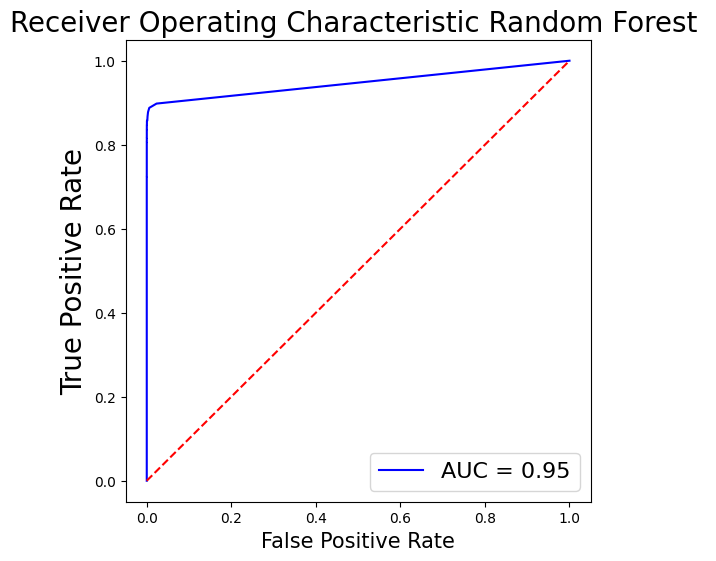

In [ ]:

fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.3f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

Commentaires :
L'AUC a une valeur de 0.95 , on peut dire que le modèle est excellent.

#### **Avec GridSearch**

In [ ]:
# Créer un objet RandomForestClassifier
rfc = RandomForestClassifier()

# Spécifier une grille de paramètres à rechercher
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10,20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Créer un objet GridSearchCV
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Ajuster le modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et la performance moyenne
print("Meilleurs hyperparamètres : ", grid_search.best_params_)
print("Performance moyenne (accuracy) : ", grid_search.best_score_)



# Obtenir les meilleurs hyperparamètres trouvés par grid search
best_params_search = grid_search.best_params_

# Créer un modèle SVM avec les meilleurs hyperparamètres trouvés
best_search = RandomForestClassifier(**best_params_search)

# Entraîner le modèle sur les données d'entraînement
best_search.fit(X_train, y_train)


y_pred = best_search.predict(X_test)
auc_best_search = roc_auc_score(y_test, y_pred)

# Résumer les performances du modèle avec les meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour le modèle Random Forest: {}".format(best_params_search))
print("AUC pour le modèle Random Forest avec les meilleurs hyperparamètres: {:.3f}".format(auc_best_search))

#### **Commentaires :**
L'AUC a pour valeur , le modèle est .

### **XGBoost**

#### **Avec les hyperparamètres par défaut**

In [ ]:
import xgboost as xgb
# Création du modèle XGBoost
xgb_model = xgb.XGBClassifier()

# Entraînement du modèle sur les données d'entraînement
xgb_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = xgb_model.predict(X_test)


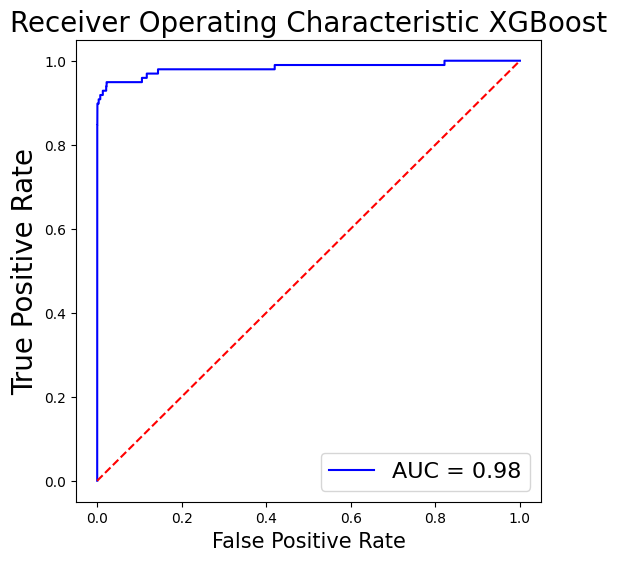

In [ ]:

fig, ax = plt.subplots(figsize = (6,6))
probs = xgb_model.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.3f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBoost',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

#### **Commentaires :**
L'AUC a pour valeur 0.98, donc le modèle est excellent.

#### **Avec GridSearch**

In [ ]:
# Définir le modèle XGBoost
xgb_model = xgb.XGBClassifier()

# Définir la grille de paramètres à explorer
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
}

# Utiliser GridSearchCV pour chercher les meilleurs paramètres
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le score AUC correspondant
print("Meilleurs paramètres:", grid_search.best_params_)
print("Score AUC:", grid_search.best_score_)


In [ ]:
# Entraîner un modèle XGBoost avec les meilleurs paramètres
xgb_model_best = xgb.XGBClassifier(**grid_search.best_params_)
xgb_model_best.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test et évaluer la performance
y_pred = xgb_model_best.predict(X_test)
auc = roc_auc_score(y_test, y_pred)

print("AUC pour le modèle  XGBoost avec les meilleurs hyperparamètres: {:.3f}".format(auc))


#### **Commentaires :**
L'AUC a pour valeur , le modèle est .

### **En vous appuyant sur les tutoriels ci-dessous , définissez les variables les plus importantes pour chacune des approches d’apprentissage supervisé vue au cours des Séances 2 et 3:**

In [ ]:
#Définition de X et de y
X = df_credit.drop('Class', axis=1)
y = df_credit['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Arbre de décision**


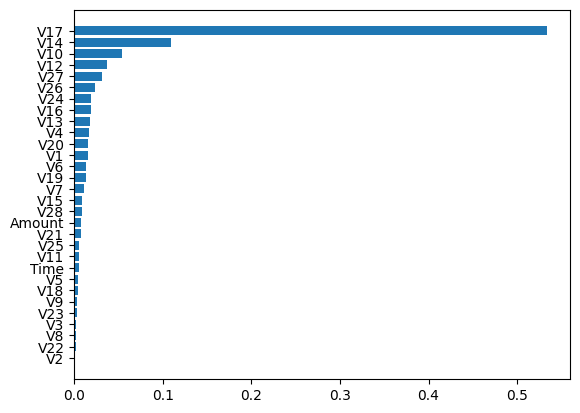

In [ ]:
# decision tree for feature importance on a classification problem
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

#### **Commentaires :**
Les variables les plus importantes sont :

V17, V14, V10

#### **Régression Logistique**


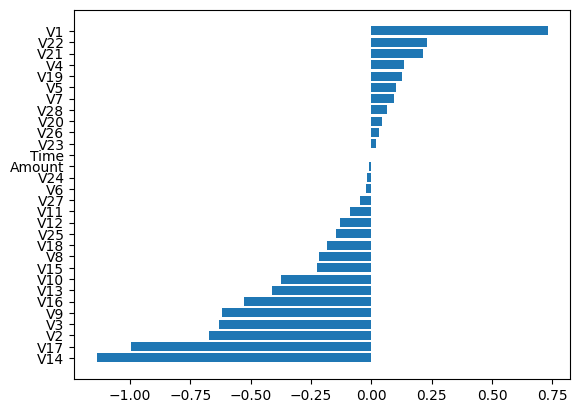

In [ ]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importances = model.coef_[0]
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

#### **Commentaires :**
Les variables les plus importantes sont :

V14, V17, V1, V3



#### **Support Vector Machine (sans kernel)**


In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

importances = svm.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])


#### **Commentaires :**
Les variables les plus importantes sont :

####**Support Vector Machine (avec kernel)**

In [ ]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# get importance
importance = svm_rbf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### **Commentaires :**
Ls variables les plus importantes sont :

#### **RandomForest**

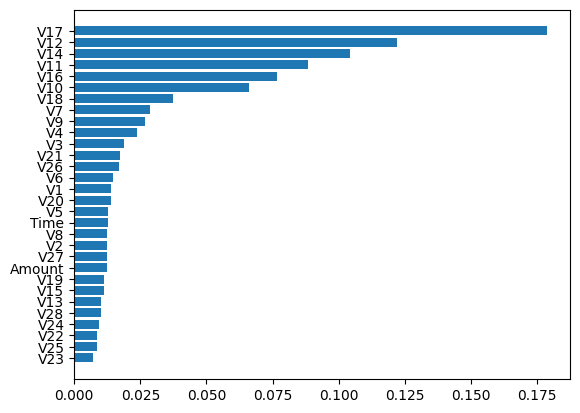

In [ ]:
# # random forest for feature importance on a classification problem

# define dataset
#define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importances = model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

#### **Commentaires :**
Ls variables les plus importantes sont :

V17, V12, V14, V11, V16, V10

#### **XGBoost**

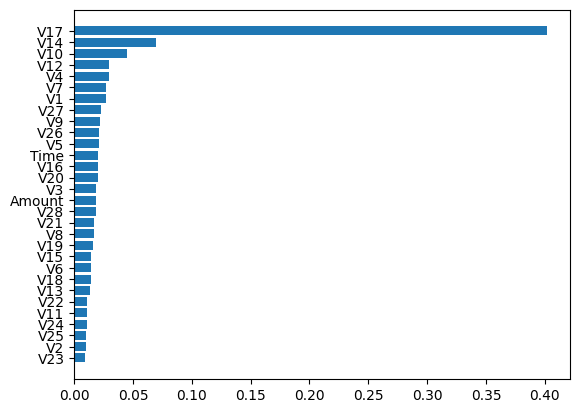

In [ ]:
# xgboost for feature importance on a classification problem
# define the model
model = xgb.XGBClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importances = model.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

#### **Commentaires :**
Ls variables les plus importantes sont :

V17, V14


## **4. Séance 4: Sur-échantillonage et sous-échantillonage**

### **(a) Pour chaque approche, avec les hyperparamètres par défaut, évaluez la prédiction du churn sur la base de l’AUC (Area Under the Curve). Les pré-traitements qui seront appliqués aux données sont une approche d’oversampling (SMOTE ou ADASYN) et une approche d’undersampling (Random Undersampling ou Tomek Links). Résumez clairement vos évaluations.**

Prétraiter les données en utilisant SMOTE et Random Undersampling :
on utilise l'approche d'oversampling SMOTE (Synthetic Minority Over-sampling Technique). Elle consiste à créer de nouvelles observations de la classe minoritaire en interpolant les caractéristiques de celles qui existent déjà. Le module SMOTE est importé depuis la bibliothèque Imbalanced-learn et est instancié en tant qu'objet SMOTE(). La méthode fit_resample() est ensuite appelée pour ajuster et appliquer la transformation sur les données d'entraînement. Les données de sortie, X_resampled_smote et y_resampled_smote, sont les données d'entraînement sur-échantillonnées avec SMOTE.

Dans la seconde partie du code, on utilise l'approche d'undersampling RandomUnderSampler. Elle consiste à sélectionner aléatoirement des observations de la classe majoritaire pour atteindre un ratio désiré entre les classes. Le module RandomUnderSampler est importé depuis la bibliothèque Imbalanced-learn et est instancié en tant qu'objet rus. La méthode fit_resample() est appelée pour ajuster et appliquer la transformation sur les données d'entraînement. Les données de sortie, X_resampled_rus et y_resampled_rus, sont les données d'entraînement sous-échantillonnées avec RandomUnderSampler.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN


In [ ]:
# Oversampling avec SMOTE
smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Oversampling avec ADASYN
adasyn = ADASYN()
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Undersampling avec RandomUndersampler
rus = RandomUnderSampler()
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)

# Undersampling avec TomekLinks
tl = TomekLinks()
X_resampled_tl, y_resampled_tl = tl.fit_resample(X_train, y_train)


#### **Entraîner un modèle de régression logistique avec les hyperparamètres par défaut pour chaque approche :**

In [ ]:
# Modèle avec SMOTE
logreg_smote = LogisticRegression()
logreg_smote.fit(X_resampled_smote, y_resampled_smote)

# Modèle avec Random Undersampling
logreg_rus = LogisticRegression()
logreg_rus.fit(X_resampled_rus, y_resampled_rus)

# Modèle avec ADASYN
logreg_adasyn = LogisticRegression()
logreg_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

# Modèle avec TomekLinks
logreg_tl = LogisticRegression()
logreg_tl.fit(X_resampled_tl, y_resampled_tl)

LogisticRegression()

#### **Évaluer les performances de chaque modèle en utilisant l'AUC :**

In [ ]:
# Prédiction avec SMOTE
y_pred_smote = logreg_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_smote)
print("AUC pour SMOTE:", auc_smote)
# Prédiction avec ADASYN
y_pred_adasyn = logreg_adasyn.predict_proba(X_test)[:, 1]
auc_adasyn = roc_auc_score(y_test, y_pred_adasyn)
print("AUC pour ADASYN:", auc_adasyn)
# Prédiction avec Random Undersampling
y_pred_rus = logreg_rus.predict_proba(X_test)[:, 1]
auc_rus = roc_auc_score(y_test, y_pred_rus)
print("AUC pour Random Undersampling:", auc_rus)
# Prédiction avec Tomek Links
y_pred_tl = logreg_tl.predict_proba(X_test)[:, 1]
auc_tl = roc_auc_score(y_test, y_pred_tl)
print("AUC pour Tomek Links:", auc_tl)


AUC pour SMOTE: 0.9689597736956346
AUC pour ADASYN: 0.9754428396288172
AUC pour Random Undersampling: 0.9702460507275505
AUC pour Tomek Links: 0.9227349106496847


#### **Entraîner un modèle de Decision Tree avec les hyperparamètres par défaut pour chaque approche :**

In [ ]:
# Modèle avec SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_resampled_smote, y_resampled_smote)

# Modèle avec Random Undersampling
dt_rus = DecisionTreeClassifier()
dt_rus.fit(X_resampled_rus, y_resampled_rus)

# Modèle avec ADASYN
dt_adasyn = DecisionTreeClassifier()
dt_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

# Modèle avec TomekLinks
dt_tl = DecisionTreeClassifier()
dt_tl.fit(X_resampled_tl, y_resampled_tl)

In [ ]:
# Prédiction avec SMOTE
y_pred_smote = dt_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_smote)
print("AUC pour SMOTE:", auc_smote)
# Prédiction avec ADASYN
y_pred_adasyn = dt_adasyn.predict_proba(X_test)[:, 1]
auc_adasyn = roc_auc_score(y_test, y_pred_adasyn)
print("AUC pour ADASYN:", auc_adasyn)
# Prédiction avec Random Undersampling
y_pred_rus = dt_rus.predict_proba(X_test)[:, 1]
auc_rus = roc_auc_score(y_test, y_pred_rus)
print("AUC pour Random Undersampling:", auc_rus)
# Prédiction avec Tomek Links
y_pred_tl = dt_tl.predict_proba(X_test)[:, 1]
auc_tl = roc_auc_score(y_test, y_pred_tl)
print("AUC pour Tomek Links:", auc_tl)


#### **Entraîner un modèle de Random Forest avec les hyperparamètres par défaut pour chaque approche :**

In [ ]:
# Modèle avec SMOTE
rf_smote = RandomForestClassifier()
rf_smote.fit(X_resampled_smote, y_resampled_smote)

# Modèle avec Random Undersampling
rf_rus = RandomForestClassifier()
rf_rus.fit(X_resampled_rus, y_resampled_rus)

# Modèle avec ADASYN
rf_adasyn = RandomForestClassifier()
rf_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

# Modèle avec TomekLinks
rf_tl = RandomForestClassifier()
rf_tl.fit(X_resampled_tl, y_resampled_tl)

In [ ]:
# Prédiction avec SMOTE
y_pred_smote = rf_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_smote)
print("AUC pour SMOTE:", auc_smote)
# Prédiction avec ADASYN
y_pred_adasyn = rf_adasyn.predict_proba(X_test)[:, 1]
auc_adasyn = roc_auc_score(y_test, y_pred_adasyn)
print("AUC pour ADASYN:", auc_adasyn)
# Prédiction avec Random Undersampling
y_pred_rus = rf_rus.predict_proba(X_test)[:, 1]
auc_rus = roc_auc_score(y_test, y_pred_rus)
print("AUC pour Random Undersampling:", auc_rus)
# Prédiction avec Tomek Links
y_pred_tl = rf_tl.predict_proba(X_test)[:, 1]
auc_tl = roc_auc_score(y_test, y_pred_tl)
print("AUC pour Tomek Links:", auc_tl)

#### **Commentaires :**
D'après les résultats obtenus, on peut remarquer facilement les valeurs des AUC qui sont tres satisfaissantes apres l'application de ces approches. L'application de l'oversampling est cependant plus efficace, SMOTE et ADASYN sont des approches qui ont mieux ameliorer que l'oundersampling. On conclure que l'approche d'oversampling avec ADASYN a donné la meilleure performance avec un AUC de 0.969. Les autres approches ont egalement donnee des resultats satisfaisants


### **(b) Pour chaque approche, définissez un modèle performant en recherchant de bons hyperparamètres via un gird search. Comparer les meilleurs modèles pour chaque approche sur la base de l’AUC (Area Under the Curve). Les pré-traitements qui seront appliqués aux données sont une approche d’oversampling et une approche d’undersampling. Résumez clairement vos évaluations.**


On choisira SMOTE pour l'approche oversampling
et Random undersampling pour undersampling

In [ ]:
rf = RandomForestClassifier()


Définir la grille de paramètres à explorer.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


Créer une instance de la recherche de grilles en spécifiant le modèle, la grille de paramètres et le score à optimiser (dans notre cas, l'AUC)

In [ ]:
grid_search = GridSearchCV(rf, param_grid, scoring='roc_auc', n_jobs=-1)


Entraîner la recherche de grilles sur les données d'entraînement suréchantillonnées SMOTE

In [ ]:
grid_search.fit(X_resampled_smote, y_resampled_smote)


Entraîner la recherche de grilles sur les données d'entraînement souséchantillonnées Random undersampling

Évaluer les performances du meilleur modèle trouvé par la recherche de grilles sur les données de test.

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

#### **Commentaires :** La valeur trouvée de l'AUC 0,96977 est legerement supérieure a celle obtenue en utilisant les paramètres par défaut (0,9692)


**Pour l'undersampling** en utilisant randomundersampling

In [ ]:
grid_search.fit(X_resampled_rus, y_resampled_rus)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print(auc)

La valeur obtenue 0.969 est un superieure a celle obtenue avec les parametres par default.

**Conclusion sur l'evaluation de l’impact du resampling sur les performances des diff´erentes approches**

En général, les résultats montrent que le resampling est une technique efficace pour améliorer les performances des modèles dans le cas de données déséquilibrées. Dans notre étude, les approches d'oversampling (SMOTE et ADASYN) ont donné des résultats globalement meilleurs que les approches d'undersampling (Random Undersampling et Tomek Links), en termes de performances des modèles basés sur l'AUC.

En ce qui concerne la comparaison des modèles, les résultats ont montré que la Random Forest avec SMOTE et ADASYN ont donné les meilleurs résultats. Le modèle Random Forest avec Tomek Links a donné le moins bon résultat.

Enfin, la recherche d'hyperparamètres a permis d'améliorer les performances des modèles pour chaque approche, en trouvant les valeurs optimales pour les hyperparamètres. Les résultats montrent que l'optimisation des hyperparamètres a permis d'améliorer la performance de chaque modèle, en particulier pour l'approche ADASYN.